# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [ ]:
%pip install -r requirements.txt

In [28]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Training

In [45]:
trained_agent, all_rewards = simulate.train('./eval_configs/config_10.json')

c:\Marc\Halckathon\hackathon_toolkit\agent.py:113: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=(self.device.type == "cuda"))


Tentative de chargement du checkpoint: my_full_checkpoint.pth
Checkpoint chargé avec succès depuis my_full_checkpoint.pth !


c:\Marc\Halckathon\hackathon_toolkit\agent.py:252: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(self.device.type=="cuda")):


Episode 1/1000, total_reward=-200.00000000000176

Pygame window closed
Entraînement interrompu par l'utilisateur.
Entraînement terminé. Checkpoint final sauvegardé.


In [39]:
trained_agent, all_rewards = simulate.train('./config.json',  max_episodes_override=300, checkpoint_path="my_full_checkpoint.pth", save_interval=50)

c:\Marc\Halckathon\hackathon_toolkit\agent.py:113: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=(self.device.type == "cuda"))


Tentative de chargement du checkpoint: my_full_checkpoint.pth
ERREUR : Error(s) in loading state_dict for DuelingDQN:
	size mismatch for feature.0.weight: copying a param with shape torch.Size([256, 26]) from checkpoint, the shape in current model is torch.Size([256, 46]).
Mismatch de dimension ? On ignore ce checkpoint.
Episode 1/300, total_reward=-9.99999999999998


c:\Marc\Halckathon\hackathon_toolkit\agent.py:252: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(self.device.type=="cuda")):


Episode 2/300, total_reward=-9.99999999999998
Episode 3/300, total_reward=-9.99999999999998
Episode 4/300, total_reward=-9.99999999999998
Episode 5/300, total_reward=-9.99999999999998
Episode 6/300, total_reward=-9.99999999999998
Episode 7/300, total_reward=-9.99999999999998
Episode 8/300, total_reward=-9.99999999999998
Episode 9/300, total_reward=-9.99999999999998
Episode 10/300, total_reward=-9.99999999999998
Episode 11/300, total_reward=-9.99999999999998
Episode 12/300, total_reward=-9.99999999999998
Episode 13/300, total_reward=-9.99999999999998
Episode 14/300, total_reward=-9.99999999999998
Episode 15/300, total_reward=-9.99999999999998
Episode 16/300, total_reward=-9.99999999999998
Episode 17/300, total_reward=-9.99999999999998
Episode 18/300, total_reward=-9.99999999999998
Episode 19/300, total_reward=-9.99999999999998
Episode 20/300, total_reward=-9.99999999999998
Episode 21/300, total_reward=-9.99999999999998
Episode 22/300, total_reward=-9.99999999999998
Episode 23/300, total

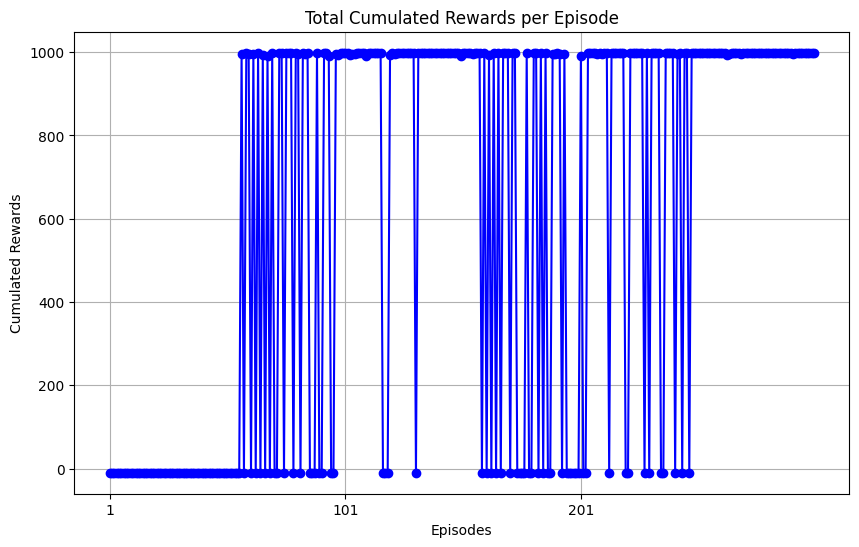

In [40]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [41]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [42]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)


--- Evaluating Configuration: ./eval_configs/config_1.json ---

--- Evaluating Configuration: ./eval_configs/config_2.json ---

--- Evaluating Configuration: ./eval_configs/config_3.json ---

--- Evaluating Configuration: ./eval_configs/config_4.json ---

--- Evaluating Configuration: ./eval_configs/config_5.json ---

--- Evaluating Configuration: ./eval_configs/config_6.json ---

--- Evaluating Configuration: ./eval_configs/config_7.json ---

--- Evaluating Configuration: ./eval_configs/config_8.json ---

--- Evaluating Configuration: ./eval_configs/config_9.json ---

--- Evaluating Configuration: ./eval_configs/config_10.json ---


In [43]:
display(all_results)

,config_path,episode,total_reward,evacuated_agents,deactivated_agents
0,./eval_configs/config_1.json,1,998.7,1,0
1,./eval_configs/config_1.json,2,998.7,1,0
2,./eval_configs/config_1.json,3,998.7,1,0
3,./eval_configs/config_1.json,4,998.7,1,0
4,./eval_configs/config_1.json,5,998.7,1,0
...,...,...,...,...,...
95,./eval_configs/config_10.json,6,-200.0,0,0
96,./eval_configs/config_10.json,7,-200.0,0,0
97,./eval_configs/config_10.json,8,-200.0,0,0
98,./eval_configs/config_10.json,9,-200.0,0,0


In [44]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)

,config_path,total_reward,evacuated_agents,deactivated_agents
0,./eval_configs/config_1.json,998.70,1.0,0.0
1,./eval_configs/config_10.json,-200.00,0.0,0.0
2,./eval_configs/config_2.json,-15.00,0.0,0.0
3,./eval_configs/config_3.json,172.67,0.2,0.0
4,./eval_configs/config_4.json,-40.00,0.0,0.0
5,./eval_configs/config_5.json,-80.00,0.0,0.0
6,./eval_configs/config_6.json,-100.00,0.0,0.0
7,./eval_configs/config_7.json,-120.00,0.0,0.0
8,./eval_configs/config_8.json,-140.00,0.0,0.0
9,./eval_configs/config_9.json,-160.00,0.0,0.0
